Sobre o conjunto de dados
- O conjunto de dados se refere a venda dos carros usados ao longo dos anos, como a marca, a quilometragem e o Estado localizado. 
Para este conjunto de dados, irei fazer uma análise e criar modelos de  predição.

# Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('/content/true_car_listings.csv')

# Informações dos Dados

In [ ]:
dados.sample(3)

,Price,Year,Mileage,City,State,Vin,Make,Model
376423,52998,2015,61404,Grand Junction,CO,1GT424E85FF110291,GMC,Sierra
333790,40892,2015,21950,Nampa,ID,1FTEW1EG3FFB33714,Ford,F-1504WD
553609,86900,2014,36155,Warwick,RI,SALGV3TF6EA161089,Land,Rover


In [ ]:
def info_data(data):
  print('============== TAMANHO DADOS ==============')
  print('Linhas',data.shape[0])
  print('Colunas',data.shape[1])
  print('Dados duplicados',data.duplicated().sum())

  tabela = pd.DataFrame({
      'ValUni':data.nunique(),
      'ValNull':data.isnull().sum(),
      'ValNullPercent':data.isna().sum() / len(data)*100,
      'ValType':data.dtypes.values
  })
  print('============== TABELA INFORMAÇÃO DADOS ==============')
  display(tabela)
  print('-'*70)
  print('============== DESCRIÇÃO DADOS ==============')
  display(data.describe())

In [ ]:
info_data(dados)

============== TAMANHO DADOS ==============
Linhas 852122
Colunas 8
Dados duplicados 30
============== TABELA INFORMAÇÃO DADOS ==============


,ValUni,ValNull,ValNullPercent,ValType
Price,47124,0,0.0,int64
Year,22,0,0.0,int64
Mileage,158836,0,0.0,int64
City,2553,0,0.0,object
State,59,0,0.0,object
Vin,852075,0,0.0,object
Make,58,0,0.0,object
Model,2736,0,0.0,object


----------------------------------------------------------------------
============== DESCRIÇÃO DADOS ==============


,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [ ]:
dados.drop_duplicates(inplace=True)
dados.dropna(inplace=True)

# Visualização dos Dados

In [ ]:
dados.select_dtypes(include='object').columns

Index(['City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [ ]:
def colunas_type(data):
  categoria = data.select_dtypes(include='object').columns
  numerico = data.select_dtypes(exclude='object').columns
  print(categoria)
  print()
  print(numerico)
  print('----------- Colunas Categóricas -----------')
  for cat in categoria:
    print(data[cat].value_counts())
    print('-'* 40)
  print('='*70)
  print('----------- Colunas Numéricas -----------')
  for num in numerico:
    print(data[num].value_counts())
    print('-'*40)

In [ ]:
colunas_type(dados)

Index(['City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

Index(['Price', 'Year', 'Mileage'], dtype='object')
----------- Colunas Categóricas -----------
Houston          12701
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64
----------------------------------------
 TX    94646
 CA    80436
 FL    72527
 GA    39413
 IL    38680
 NC    37529
 VA    35011
 PA    28129
 NY    27932
 NJ    27852
 OH    23259
 WA    23149
 CO    23002
 AZ    22399
 TN    19163
 MA    17990
 MD    17571
 IN    16462
 MO    16163
 KY    13691
 AL    13292
 WI    11255
 MN    10996
 CT    10906
 UT    10418
 OR    10352
 MI    10328
 SC     9789
 OK     9584
 LA     8528
 KS     7894
 AR     6952
 NV     6887
 MS     6242
 NH     5694
 NE     4924
 IA     4840
 NM     4729
 ID     350

In [ ]:
categorias = ['City', 'State', 'Vin', 'Make', 'Model']
for cat in categorias: 
  print(dados[cat].value_counts())
  print('-'*40)

Houston          12701
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: City, Length: 2553, dtype: int64
----------------------------------------
 TX    94646
 CA    80436
 FL    72527
 GA    39413
 IL    38680
 NC    37529
 VA    35011
 PA    28129
 NY    27932
 NJ    27852
 OH    23259
 WA    23149
 CO    23002
 AZ    22399
 TN    19163
 MA    17990
 MD    17571
 IN    16462
 MO    16163
 KY    13691
 AL    13292
 WI    11255
 MN    10996
 CT    10906
 UT    10418
 OR    10352
 MI    10328
 SC     9789
 OK     9584
 LA     8528
 KS     7894
 AR     6952
 NV     6887
 MS     6242
 NH     5694
 NE     4924
 IA     4840
 NM     4729
 ID     3501
 HI     2995
 DE     2418
 MT     1984
 ME     1920
 RI     1858
 AK     1663
 WV     1501
 SD     1267
 VT     1123
 ND     1092
 Fl      783
 WY      610
 Va 

In [ ]:
dados.select_dtypes(exclude='object').columns

Index(['Price', 'Year', 'Mileage'], dtype='object')

In [ ]:
numericas = ['Price', 'Year', 'Mileage']
for num in numericas: 
  print(dados[num].value_counts())
  print('-'*40)

14995    4898
12995    4600
13995    4591
9995     4298
15995    4282
         ... 
53385       1
52277       1
64521       1
45506       1
60240       1
Name: Price, Length: 47124, dtype: int64
----------------------------------------
2014    162424
2015    157513
2016    132128
2017     91603
2013     74697
2012     49764
2011     39768
2010     27538
2008     24712
2007     21171
2009     19061
2006     15079
2005     11005
2004      8117
2003      5649
2002      3800
2001      2584
2000      1933
1999      1254
2018       922
1998       774
1997       596
Name: Year, dtype: int64
----------------------------------------
10        635
5         350
11        232
12        213
15        183
         ... 
235319      1
108621      1
138824      1
260012      1
392123      1
Name: Mileage, Length: 158836, dtype: int64
----------------------------------------


In [ ]:
dados.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [ ]:
dados.shape

(852092, 8)

In [ ]:
dados.sample()

,Price,Year,Mileage,City,State,Vin,Make,Model
415255,6500,2005,114707,Sanford,FL,5J6YH27385L033870,Honda,Element4WD


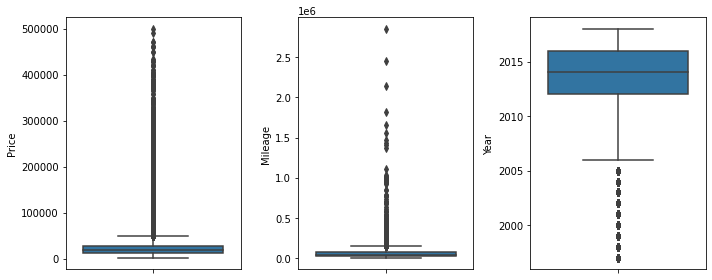

In [ ]:
# vendo a tabela com colunas numericas de no box plot
fig, axes = plt.subplots(1,3,figsize=(10,4))

sns.boxplot(y=dados['Price'],ax=axes[0])

sns.boxplot(y=dados['Mileage'],ax=axes[1])

sns.boxplot(y=dados['Year'],ax=axes[2])


plt.tight_layout()
plt.show()

###  criando uma coluna Idade para Carros

In [ ]:
dados['AgeCar'] = 2022 - dados['Year']

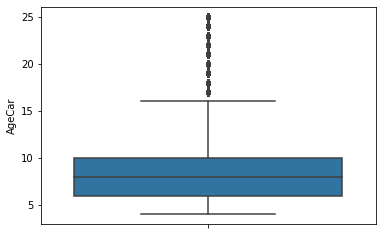

In [ ]:
sns.boxplot(y=dados['AgeCar'])

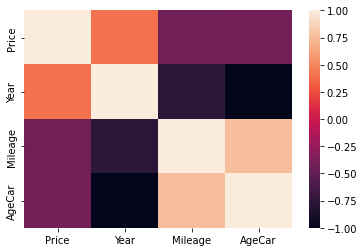

In [ ]:
sns.heatmap(dados.corr(), annot=False)

Total das Vendas


,Price
Year,
2015,3941602880
2014,3597185781
2016,3360920405
2017,2730058992
2013,1436601865
2012,866193595
2011,648604576
2010,392512412
2008,314515384


Média das Vendas


,Price
Year,
2018,41397.838395
2017,29803.161381
2016,25436.852181
2015,25023.984560
2014,22146.885811
2013,19232.390391
2012,17406.028354
2011,16309.710722
2010,14253.482896


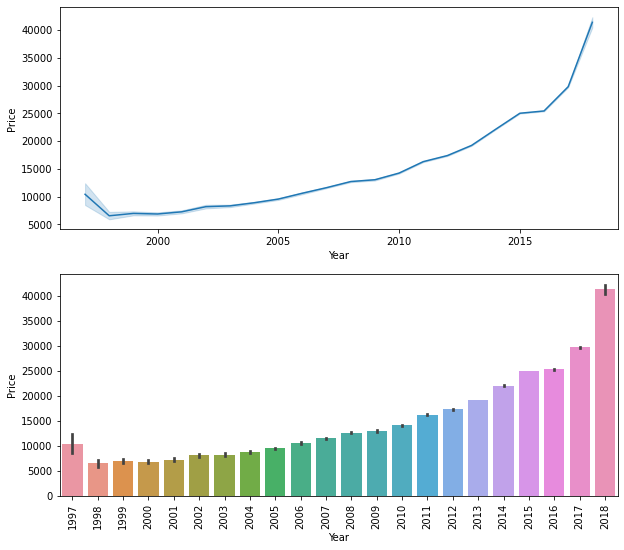

In [ ]:
# agrupamento das colunas desejadas
ano_vendas = dados[['Price','Year']].groupby('Year').sum()
ano_vendas_mean = dados[['Price','Year']].groupby('Year').mean()
# total de vendas
print('Total das Vendas')
display(ano_vendas.sort_values('Price',ascending=False))
# média das vendas
print('Média das Vendas')
display(ano_vendas_mean.sort_values('Price',ascending=False))

# configuração do gráfico
fig,axes  = plt.subplots(2,1,figsize=(10,9))

# gráfico
sns.lineplot(x=dados['Year'], y=dados['Price'],ax=axes[0])
sns.barplot(x=dados['Year'], y=dados['Price'],ax=axes[1])
plt.xticks(rotation=90);

plt.show()

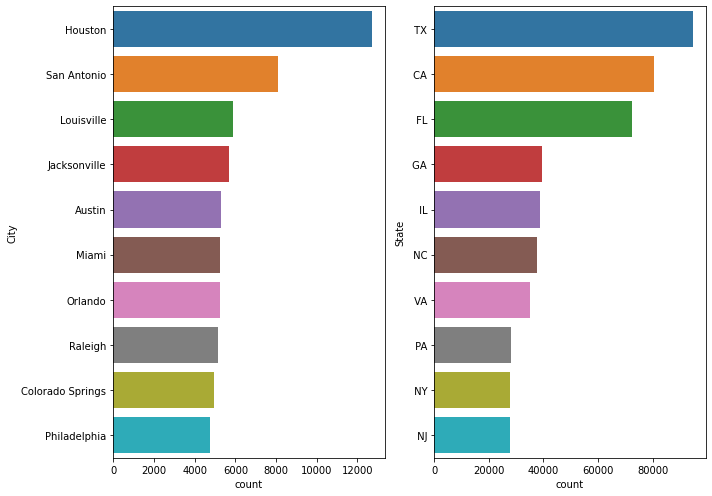

In [ ]:
# frequencia de cidade e estado
fig, axes = plt.subplots(1,2,figsize=(10,7))

sns.countplot(y=dados['City'],order=dados['City'].value_counts().index[0:10],ax=axes[0])
sns.countplot(y=dados['State'],order=dados['State'].value_counts().index[0:10],ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
marca_vendas = dados[['Make','Price']].groupby('Make').sum()
marca_vendas_mean = dados[['Make','Price']].groupby('Make').mean()
print('Total de Vendas por Marca')
display(marca_vendas.sort_values('Price',ascending=False))
print('Média de Vendas por Marca')
display(marca_vendas_mean.sort_values('Price',ascending=False))

Total de Vendas por Marca


,Price
Make,
Ford,2363876755
Chevrolet,2258850630
Toyota,1524717253
Nissan,1108119397
Jeep,910856907
BMW,872634901
Honda,840179771
Mercedes-Benz,835391504
GMC,825306972


Média de Vendas por Marca


,Price
Make,
McLaren,222232.234043
Rolls-Royce,202772.836957
Ferrari,201742.968116
Lamborghini,191648.272727
Bentley,101075.310627
Aston,99573.617450
Maybach,87294.300000
Tesla,62679.151515
AM,59934.210526


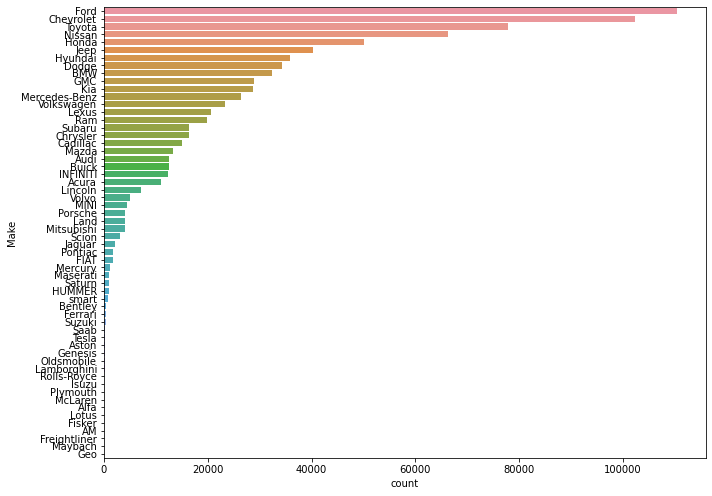

In [ ]:
# frequência de carros
plt.figure(figsize=(10,7))
sns.countplot(y=dados['Make'], order=dados['Make'].value_counts().index)
plt.tight_layout()

Ford mais amada

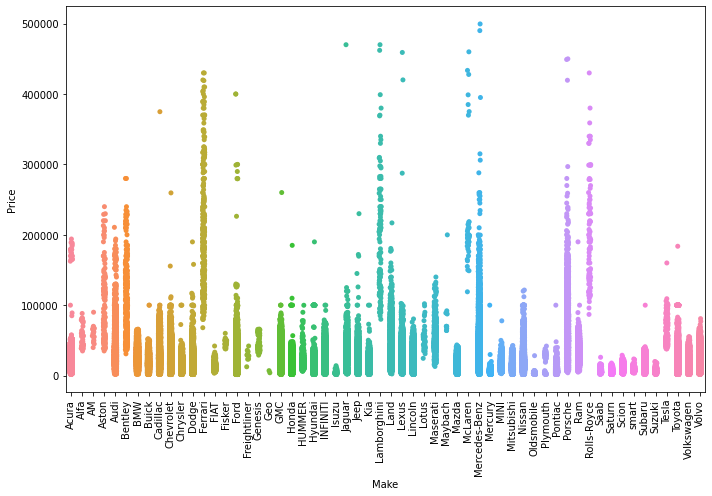

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(x=dados['Make'], y=dados['Price'])
plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

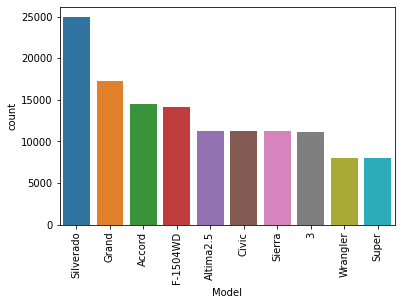

In [ ]:
# os dez modelos mais frequentes
sns.countplot(x=dados['Model'],order=dados['Model'].value_counts().index[0:10])
plt.xticks(rotation=90);
plt.show()

In [ ]:
print('Preço Alto:',dados['Price'].max())
print('Preço Baixo:',dados['Price'].min())
print('Preço Médio:',dados['Price'].mean())
print('Preço Mediano:',dados['Price'].median())
print('Variancia do Preço:',dados['Price'].std())

Preço Alto: 499500
Preço Baixo: 1500
Preço Médio: 21464.323952108458
Preço Mediano: 18500.0
Variancia do Preço: 13596.35080793993


In [ ]:
# carros com idades mais longa quantos
print('Qual a idade longa do carros usados?')
print('----',dados['AgeCar'].max(),'----')
print('Qual a idade miníma dos carros usados?')
print('----',dados['AgeCar'].min(),'----')
print('Qual a idade média dos carros usados ?')
print('----',dados['AgeCar'].mean(),'----')
print('Quantos carros usados temos por idade?')
print(dados['AgeCar'].value_counts())

Qual a idade longa do carros usados?
---- 25 ----
Qual a idade miníma dos carros usados?
---- 4 ----
Qual a idade média dos carros usados ?
---- 8.710903282744116 ----
Quantos carros usados temos por idade?
8     162424
7     157513
6     132128
5      91603
9      74697
10     49764
11     39768
12     27538
14     24712
15     21171
13     19061
16     15079
17     11005
18      8117
19      5649
20      3800
21      2584
22      1933
23      1254
4        922
24       774
25       596
Name: AgeCar, dtype: int64


In [ ]:
# carros usados abaixo da média
baixos_usados = dados[dados['Price'] < 21464]
# carros usados acima da média
acima_usados = dados[dados['Price'] > 21464]

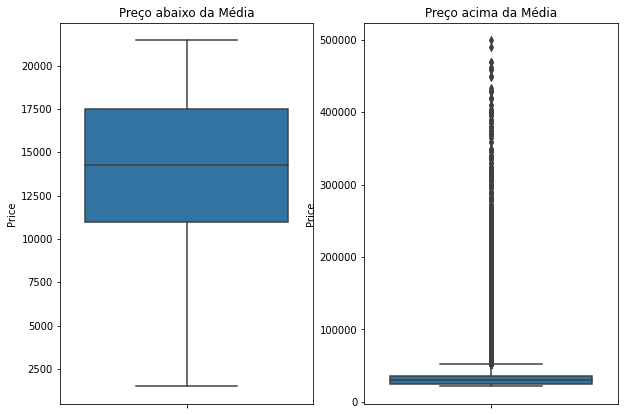

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,7))
sns.boxplot(y=baixos_usados['Price'], ax=axes[0])
axes[0].set_title('Preço abaixo da Média')
sns.boxplot(y=acima_usados['Price'],ax=axes[1])
axes[1].set_title('Preço acima da Média')

plt.show()

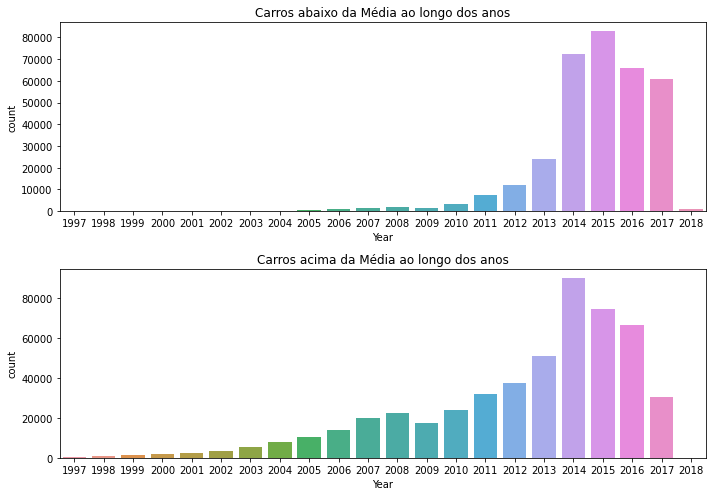

In [ ]:
fig,axes= plt.subplots(2,1, figsize=(10,7))

sns.countplot(x=acima_usados['Year'],ax=axes[0])
axes[0].set_title('Carros abaixo da Média ao longo dos anos')
sns.countplot(x=baixos_usados['Year'],ax=axes[1])
axes[1].set_title('Carros acima da Média ao longo dos anos')

plt.tight_layout()
plt.show()

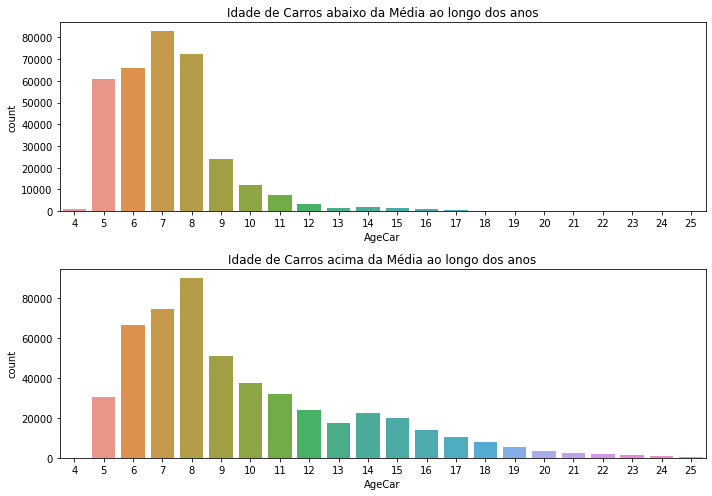

In [ ]:
fig,axes= plt.subplots(2,1, figsize=(10,7))

sns.countplot(x=acima_usados['AgeCar'],ax=axes[0])
axes[0].set_title('Idade de Carros abaixo da Média ao longo dos anos')
sns.countplot(x=baixos_usados['AgeCar'],ax=axes[1])
axes[1].set_title('Idade de Carros acima da Média ao longo dos anos')

plt.tight_layout()
plt.show()

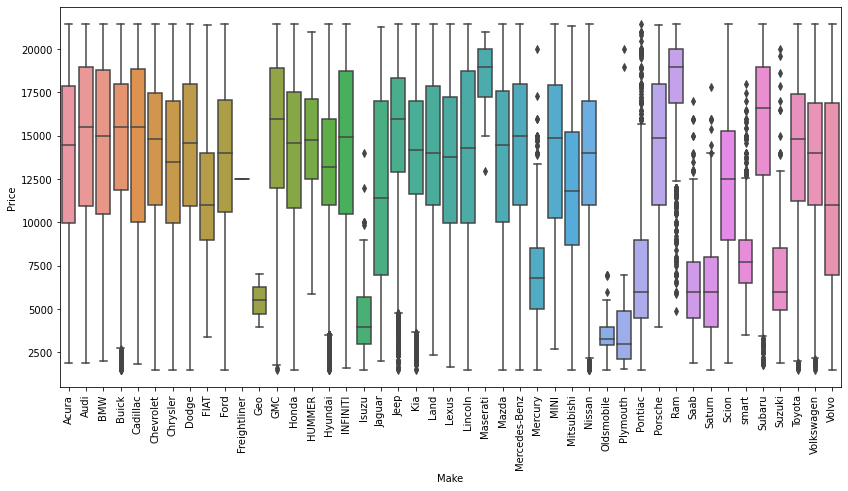

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=baixos_usados['Make'], y=baixos_usados['Price'])
plt.xticks(rotation=90)
plt.show()

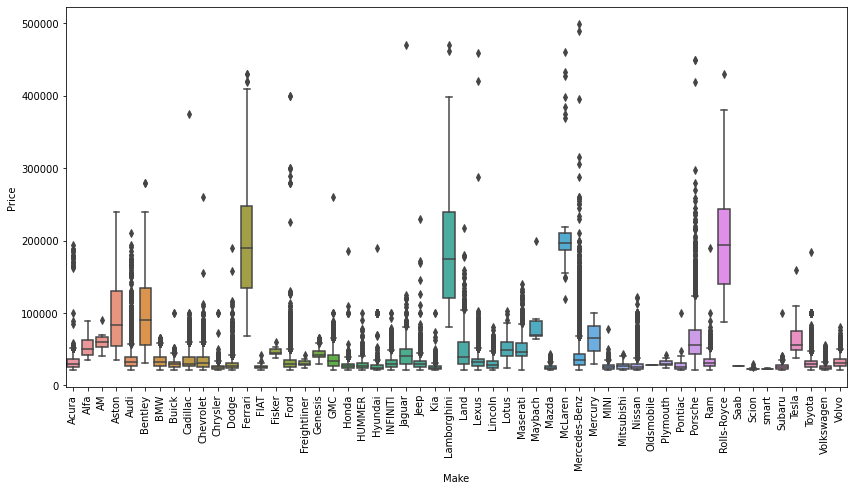

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=acima_usados['Make'], y=acima_usados['Price'])
plt.xticks(rotation=90)
plt.show()

Total das vendas do preço abaixo da média de carros usados


,Price
AgeCar,
8,1395529490
7,1187777858
6,1067410121
9,730138766
5,536810136
10,502337575
11,425940249
12,296223019
14,246286498


Média das vendas do preço abaixo da média de carros usados


,Price
AgeCar,
4,18846.583333
5,17497.070926
6,16071.097007
7,15889.792217
8,15480.769973
9,14347.955628
10,13365.729433
11,13273.301620
12,12239.609082


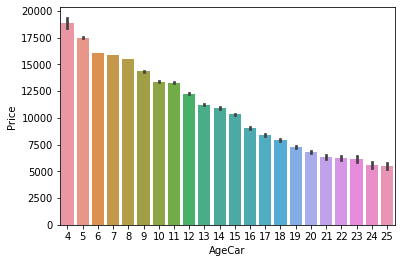

In [ ]:
preco_baixo = baixos_usados[['Price','AgeCar']].groupby('AgeCar').sum()
preco_baixo_mean = baixos_usados[['Price','AgeCar']].groupby('AgeCar').mean()

print('Total das vendas do preço abaixo da média de carros usados')
display(preco_baixo.sort_values('Price',ascending=False))
print('Média das vendas do preço abaixo da média de carros usados')
display(preco_baixo_mean.sort_values('Price',ascending=False))

sns.barplot(x=baixos_usados['AgeCar'], y=baixos_usados['Price'])

Total das vendas do preço abaixo da média de carros usados


,Price
AgeCar,
7,2753825022
6,2293467356
8,2201634827
5,2193248856
9,706463099
10,363856020
11,222664327
12,96289393
14,68228886


Média das vendas do preço abaixo da média de carros usados


,Price
AgeCar,
25,81527.512821
24,62716.153846
20,43384.356164
4,42000.544543
22,37839.897436
5,36000.342334
19,35675.130233
6,34903.928837
16,34110.014690


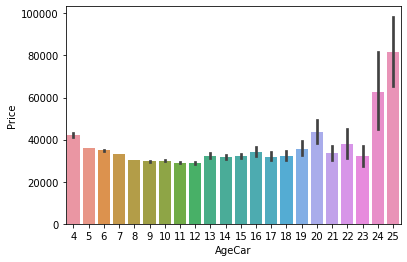

In [ ]:
preco_acima = acima_usados[['Price','AgeCar']].groupby('AgeCar').sum()
preco_acima_mean = acima_usados[['Price','AgeCar']].groupby('AgeCar').mean()

print('Total das vendas do preço abaixo da média de carros usados')
display(preco_acima.sort_values('Price',ascending=False))
print('Média das vendas do preço abaixo da média de carros usados')
display(preco_acima_mean.sort_values('Price',ascending=False))

sns.barplot(x=acima_usados['AgeCar'], y=acima_usados['Price'])

In [ ]:
# preço por idade
preco_idade = dados[['Price','AgeCar']].groupby('AgeCar').sum()
preco_idade.sort_values('Price',ascending=False)

,Price
AgeCar,
7,3941602880
8,3597185781
6,3360920405
5,2730058992
9,1436601865
10,866193595
11,648604576
12,392512412
14,314515384


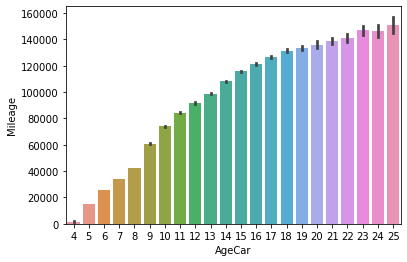

In [ ]:
sns.barplot(x=dados['AgeCar'], y=dados['Mileage'])

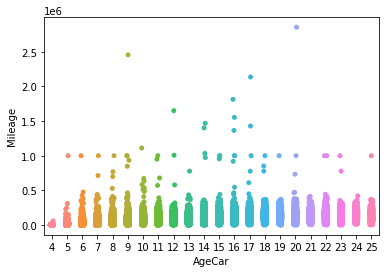

In [ ]:
sns.stripplot(x=dados['AgeCar'], y=dados['Mileage'])

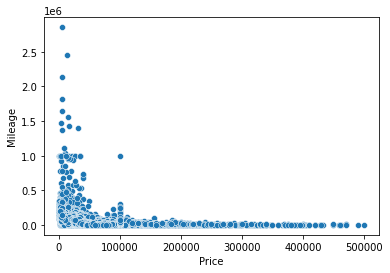

In [ ]:
sns.scatterplot(x=dados['Price'], y=dados['Mileage'])

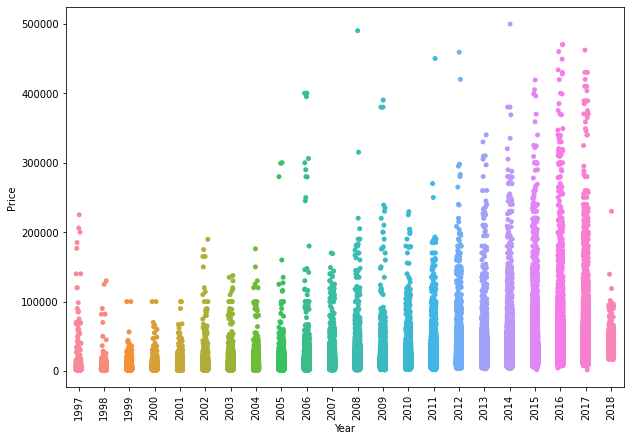

In [ ]:
# ano que teve maior preço
plt.figure(figsize=(10,7))
sns.stripplot(x=dados['Year'], y=dados['Price'])
plt.xticks(rotation=90);
plt.show()

-  Apesar das vendas vendas ter subido. - Vemos aqui, que o preço de vendas não foi tão alta em 2018, enquanto 2008 e 2014 os valores foi bem maior.

In [ ]:
dados.loc[(dados['Price'] >= 45000) & (dados['Year'] == 2008)]

,Price,Year,Mileage,City,State,Vin,Make,Model,AgeCar
11118,45900,2008,10800,Rolling Meadows,IL,SCFBF03B88GC09742,Aston,Martin,14
11129,48995,2008,7412,Temple Hills,MD,SCFBF03BX8GC08902,Aston,Martin,14
11134,51986,2008,7811,Bellevue,WA,SCFBF04B08GD08781,Aston,Martin,14
11135,48880,2008,32550,Carrollton,TX,SCFBF03B98GC09037,Aston,Martin,14
11141,52500,2008,13122,Hasbrouck Heights,NJ,SCFBF04B18GD09731,Aston,Martin,14
...,...,...,...,...,...,...,...,...,...
703464,87888,2008,1519,Boerne,TX,WP0AD29968S783315,Porsche,911,14
723949,159999,2008,27201,Marrieta,GA,SCA2D685X8UX16173,Rolls-Royce,Phantom,14
723952,169888,2008,25579,Costa Mesa,CA,SCA2D68558UX16081,Rolls-Royce,Phantom,14
723965,189888,2008,43430,Costa Mesa,CA,SCA2D68588UX16026,Rolls-Royce,Phantom,14


In [ ]:
# visualizando os carros vendidos pelo preço acima de 400000
dados[dados['Price'] > 400000]

,Price,Year,Mileage,City,State,Vin,Make,Model,AgeCar
237529,403514,2017,848,Seattle,WA,ZFF82WNA9H0224060,Ferrari,GTC4LussoCoupe,5
237530,405000,2015,3436,Charlotte,NC,ZFF75VFA9F0207218,Ferrari,458,7
237531,409900,2017,1826,Fort Lauderdale,FL,ZFF80AMA3H0222735,Ferrari,488,5
237532,409900,2017,1957,Fort Lauderdale,FL,ZFF80AMA2H0222709,Ferrari,488,5
237533,419900,2017,2189,Fort Lauderdale,FL,ZFF80AMA8H0220947,Ferrari,488,5
237534,419000,2015,1795,NEWPORT BEACH,CA,ZFF75VFA9F0207977,Ferrari,458,7
237535,429900,2017,450,Fort Lauderdale,FL,ZFF80AMA6H0219005,Ferrari,488,5
237536,429900,2017,570,Fort Lauderdale,FL,ZFF80AMA7H0222950,Ferrari,488,5
480444,469973,2016,6525,Kirkland,WA,SAJBK4BV2GCY19895,Jaguar,XF35t,6
549573,462000,2017,261,Davie,FL,ZHWUC1ZD4HLA05825,Lamborghini,AventadorCoupe,5


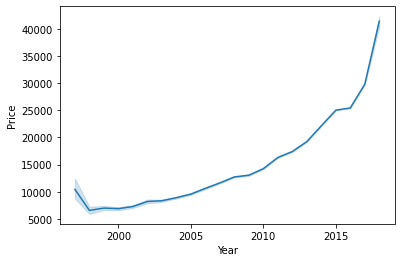

In [ ]:
# como foi as vendas ao longo dos anos?
sns.lineplot(x=dados['Year'], y=dados['Price'])

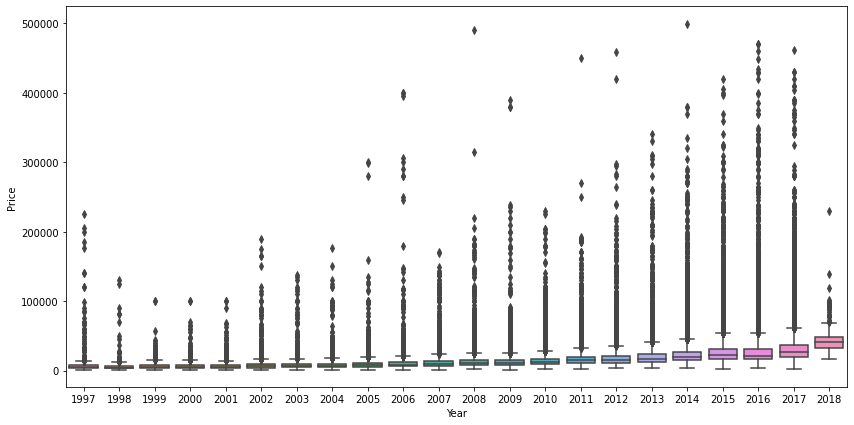

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Year'], y=dados['Price'])

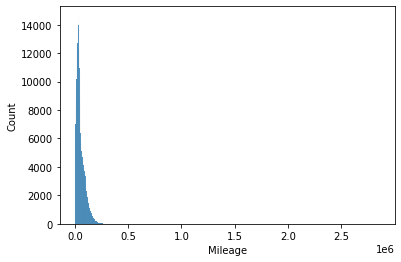

In [ ]:
sns.histplot(x=dados['Mileage'])

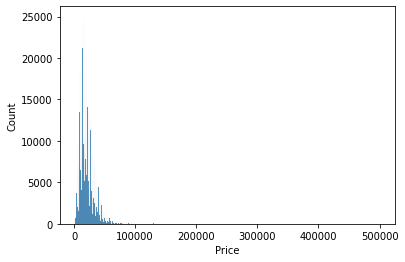

In [ ]:
sns.histplot(x=dados['Price'])

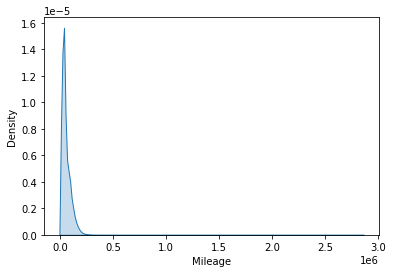

In [ ]:
sns.kdeplot(x=dados['Mileage'], shade=True)

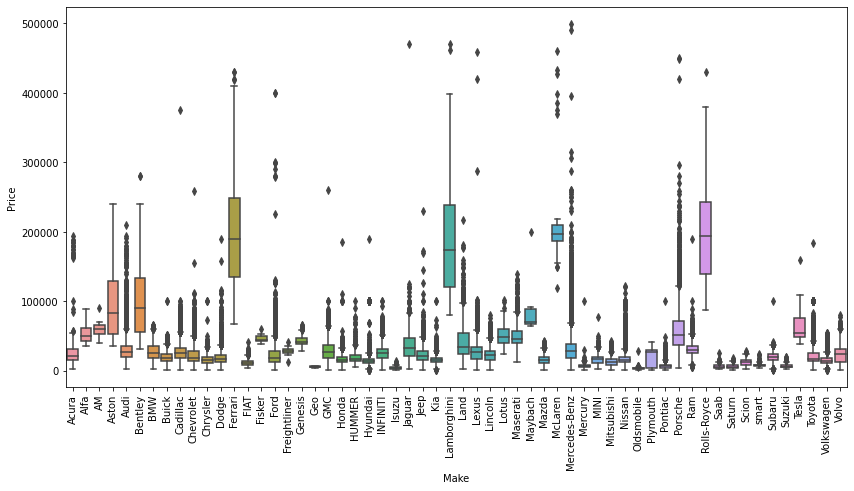

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Price'])
plt.xticks(rotation=90);

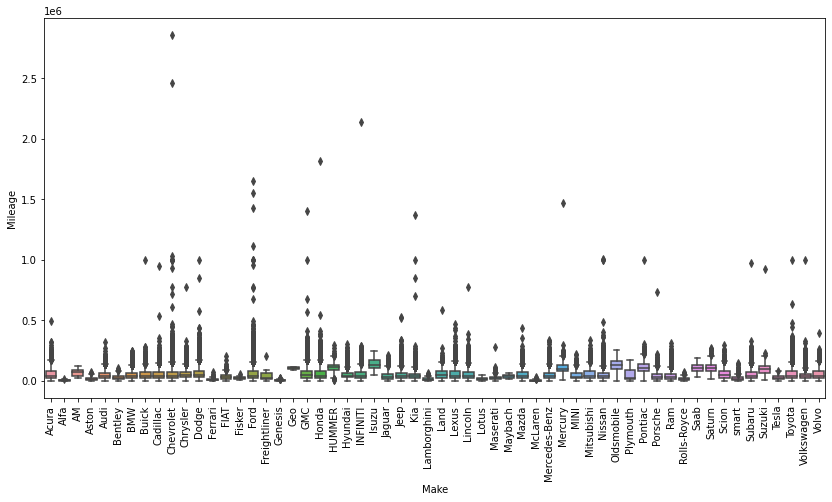

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Mileage'])
plt.xticks(rotation=90);

# Outliers ??????

## encontrado outliers e eliminando para o modelo de predição

In [ ]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(dados['Price'])

In [ ]:
# criando função para retirada de outliers
def drop_outliers(data,col):
    iqr = 1.5 * (np.percentile(data[col], 75) - np.percentile(data[col], 25))
    data.drop(data[data[col] > (iqr + np.percentile(data[col], 75))].index, inplace=True)
    data.drop(data[data[col] < (np.percentile(data[col], 25) - iqr)].index, inplace=True)

# chamando função
drop_outliers(dados,'Price')
drop_outliers(dados,'Mileage')
drop_outliers(dados,'Year')

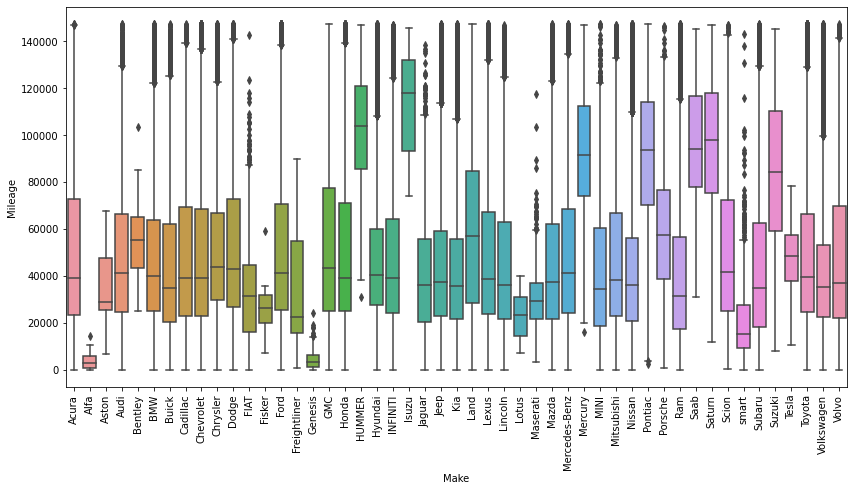

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Mileage'])
plt.xticks(rotation=90);

In [ ]:

iqr = 1.5 * (np.percentile(dados['Mileage'], 75) - np.percentile(dados['Mileage'], 25))
dados.drop(dados[dados['Mileage'] > (iqr + np.percentile(dados['Mileage'], 75))].index, inplace=True)
dados.drop(dados[dados['Mileage'] < (np.percentile(dados['Mileage'], 25) - iqr)].index, inplace=True)

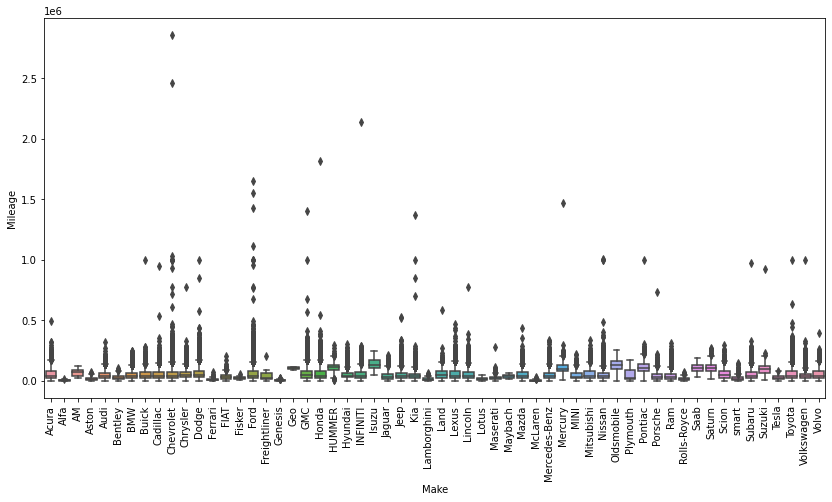

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Mileage'])
plt.xticks(rotation=90);

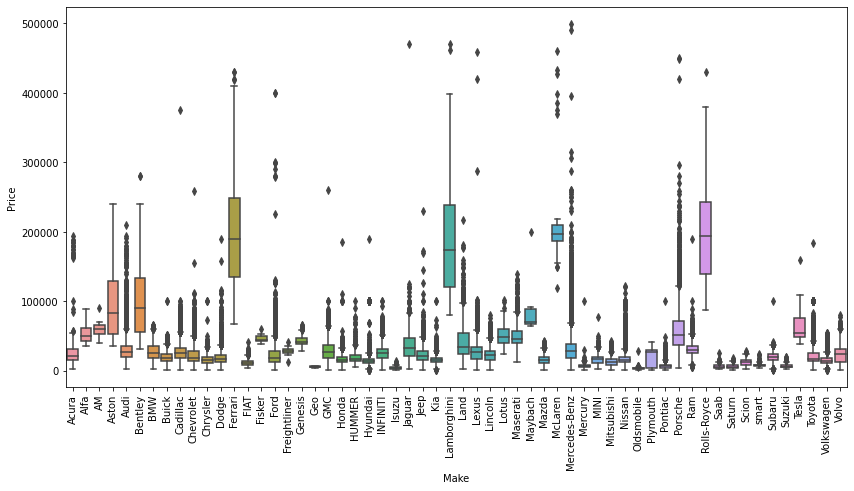

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(x=dados['Make'], y=dados['Price'])
plt.xticks(rotation=90);

In [ ]:
dados.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [ ]:
# criando função para retirada de outliers
def drop_outliers(data,col):
    iqr = 1.5 * (np.percentile(data[col], 75) - np.percentile(data[col], 25))
    data.drop(data[data[col] > (iqr + np.percentile(data[col], 75))].index, inplace=True)
    data.drop(data[data[col] < (np.percentile(data[col], 25) - iqr)].index, inplace=True)

# chamando função
drop_outliers(dados,'Price')
drop_outliers(dados,'Mileage')
drop_outliers(dados,'AgeCar')

In [ ]:
# visualizar
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
#iqr_outliers(dados['Price'])

In [ ]:
iqr_outliers(dados['Price'])
iqr_outliers(dados['Mileage'])
iqr_outliers(dados['AgeCar'])

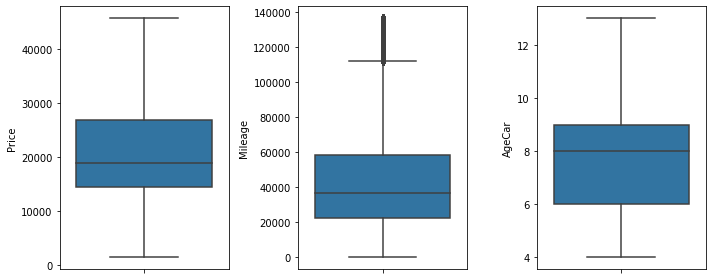

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(10,4))

sns.boxplot(y=dados['Price'],ax=axes[0])
sns.boxplot(y=dados['Mileage'],ax=axes[1])
sns.boxplot(y=dados['AgeCar'],ax=axes[2])

plt.tight_layout()
plt.show()

In [ ]:
dados.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
AgeCar      int64
dtype: object

# Preparação dos Dados

In [ ]:
y = dados['Price']
x= dados.drop('Price', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = x.select_dtypes(exclude=['float']).columns
encode = list(cols)
x[encode] = x[encode].apply(lambda col: le.fit_transform(col))
x[encode].head()

,Year,Mileage,City,State,Vin,Make,Model,AgeCar
0,5,35605,644,49,3274,0,824,4
1,4,19486,1257,39,3010,0,823,5
2,4,48730,644,49,3272,0,824,5
3,5,39802,2485,6,3127,0,823,4
4,7,22022,1228,50,16,0,826,2


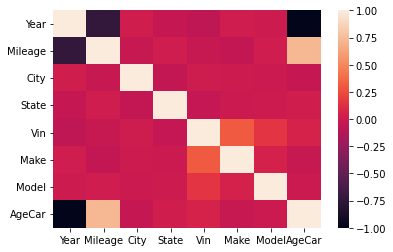

In [ ]:
sns.heatmap(x.corr(), annot=False)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
# padronização
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,0.555556,0.297586,0.252846,0.844828,0.004592,0.000000,0.429390,0.444444
1,0.444444,0.162864,0.493522,0.672414,0.004222,0.000000,0.428869,0.555556
2,0.444444,0.407285,0.252846,0.844828,0.004590,0.000000,0.429390,0.555556
3,0.555556,0.332665,0.975658,0.103448,0.004386,0.000000,0.428869,0.444444
4,0.777778,0.184060,0.482136,0.862069,0.000022,0.000000,0.430433,0.222222
...,...,...,...,...,...,...,...,...
712914,0.666667,0.332096,0.067923,0.758621,0.994009,0.978261,0.924440,0.333333
712915,0.666667,0.224295,0.242638,0.758621,0.993825,0.978261,0.924440,0.333333
712916,0.777778,0.089280,0.709855,0.603448,0.991881,0.978261,0.868161,0.222222
712917,0.777778,0.046287,0.546918,0.189655,0.989985,0.978261,0.732673,0.222222


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grade = GradientBoostingRegressor()
grade.fit(x_train, y_train)
y_pred_grade= grade.predict(x_test)
print("Accuracy on Traing set: ",grade.score(x_train,y_train))
print("Accuracy on Testing set: ",grade.score(x_test,y_test))

Accuracy on Traing set:  0.6612732170091653
Accuracy on Testing set:  0.6607773421277277


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(x_train, y_train)
y_pred_etc= etc.predict(x_test)
print("Accuracy on Traing set: ",etc.score(x_train,y_train))
print("Accuracy on Testing set: ",etc.score(x_test,y_test))

Accuracy on Traing set:  0.9999993969858729
Accuracy on Testing set:  0.9413157093686896


In [ ]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor()
bag.fit(x_train, y_train)
y_pred_bag= bag.predict(x_test)
print("Accuracy on Traing set: ",bag.score(x_train,y_train))
print("Accuracy on Testing set: ",bag.score(x_test,y_test))

Accuracy on Traing set:  0.9893708679591868
Accuracy on Testing set:  0.9400934370666416


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10)
forest.fit(x_train, y_train)
y_pred_forest= forest.predict(x_test)
print("Accuracy on Traing set: ",forest.score(x_train,y_train))
print("Accuracy on Testing set: ",forest.score(x_test,y_test))

Accuracy on Traing set:  0.9894743126159836
Accuracy on Testing set:  0.9403959515942624
